Peak times: [0.0002 0.0066 0.0136 0.0204 0.0272 0.0342 0.0408 0.0476 0.0544 0.0616
 0.068  0.0752 0.0814 0.0884 0.0948 0.1024 0.1086 0.1158 0.1296]
Peak values: [1.1125  0.85    0.675   0.55    0.5     0.43125 0.39375 0.35625 0.3
 0.25625 0.25    0.21875 0.2125  0.2     0.175   0.15625 0.15625 0.1375
 0.125  ]
19
m = 0.7859220964392828 +- 0.018679506185188884 V
n = 63.3536121320207 +- 1.348528551013588 ms
Chi2       = 93.16570929012241
dof        = 17
Chi2_red   = 5.480335840595436


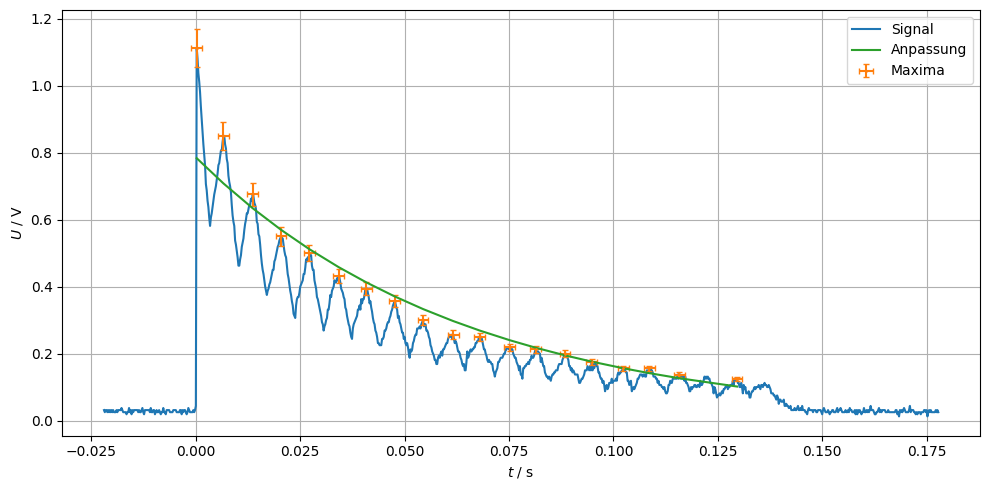

In [4]:
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = np.loadtxt("../data/print_004.csv", delimiter=",", skiprows=2)
t = data[:,0]
V = data[:,1]

# Find peaks
peaks, properties = find_peaks(V, prominence=0.05, distance=20)

# Extract peak positions
t_peaks = t[peaks]
V_peaks = V[peaks]

# trimmed
#t_peaks = t_peaks[2:]
#V_peaks = V_peaks[2:]

print("Peak times:", t_peaks)
print("Peak values:", V_peaks)

#dt_peaks=0.01*abs(t_peaks)
dt_peaks = [1.3e-3]*len(t_peaks)
#dU=0.02*abs(U)
#dtau = [0.1]*len(tau)
#dV_peaks = [0.02]*len(V_peaks)
dV_peaks = 0.05*V_peaks
print(len(t_peaks))

def f(x,m,n):
    return m*(np.exp(-x/n))

#guess=[max(V_peaks),20.0]
#guess=[max(V_peaks), (t_peaks[-1] - t_peaks[0]) / 2]
guess = [V_peaks[0], (t_peaks[-1] - t_peaks[0]) / 3]

popt, pcov=curve_fit(f,t_peaks,V_peaks,p0=guess,sigma=dV_peaks,absolute_sigma=True)
perr=np.sqrt(np.diag(pcov))

print("m =", popt[0], "+-", perr[0], "V")
print("n =", popt[1]*10**3, "+-", perr[1]*10**3, "ms")
#print('a =', popt[2], "+-", perr[2])
# compute chi-square
chi2 = np.sum(((V_peaks - f(t_peaks, *popt)) / dV_peaks)**2)

# degrees of freedom = number of data points - number of parameters
dof = len(t_peaks) - len(popt)

chi2_red = chi2 / dof

print("Chi2       =", chi2)
print("dof        =", dof)
print("Chi2_red   =", chi2_red)

# Plot to verify
plt.figure(figsize=(10,5))
plt.plot(t, V, label="Signal")
plt.errorbar(t_peaks, V_peaks,xerr=dt_peaks, yerr=dV_peaks,fmt='.', capsize=2,markersize=2, label="Maxima")
plt.plot(t_peaks,f(t_peaks,*popt), zorder=2, label='Anpassung')
plt.grid(which='minor')
plt.grid(which='major')
plt.xlabel(r'$t$ / s')
plt.ylabel(r'$U$ / V')
plt.tight_layout()
plt.legend()
plt.savefig('../plots/meiboom_gill.pdf')
plt.show()


In [5]:
# dataframe
df = pd.DataFrame({
    r'$\tau$':t_peaks*10**3,
    r'$d\tau$':[x*10**3 for x in dt_peaks],
    r'$U$ / mV':V_peaks*10**3,
    r'$dU$ / mV':dV_peaks*10**3
})
print(df.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
$\tau$ & $d\tau$ & $U$ / mV & $dU$ / mV \\
\midrule
0.200000 & 1.300000 & 1112.500000 & 55.625000 \\
6.600000 & 1.300000 & 850.000000 & 42.500000 \\
13.600000 & 1.300000 & 675.000000 & 33.750000 \\
20.400000 & 1.300000 & 550.000000 & 27.500000 \\
27.200000 & 1.300000 & 500.000000 & 25.000000 \\
34.200000 & 1.300000 & 431.250000 & 21.562500 \\
40.800000 & 1.300000 & 393.750000 & 19.687500 \\
47.600000 & 1.300000 & 356.250000 & 17.812500 \\
54.400000 & 1.300000 & 300.000000 & 15.000000 \\
61.600000 & 1.300000 & 256.250000 & 12.812500 \\
68.000000 & 1.300000 & 250.000000 & 12.500000 \\
75.200000 & 1.300000 & 218.750000 & 10.937500 \\
81.400000 & 1.300000 & 212.500000 & 10.625000 \\
88.400000 & 1.300000 & 200.000000 & 10.000000 \\
94.800000 & 1.300000 & 175.000000 & 8.750000 \\
102.400000 & 1.300000 & 156.250000 & 7.812500 \\
108.600000 & 1.300000 & 156.250000 & 7.812500 \\
115.800000 & 1.300000 & 137.500000 & 6.875000 \\
129.600000 & 1.300000 & 125.000000 & 

In [ ]:
import numpy as np
t_hahn = 39.7
dt_hahn = 2.6
t_carr = 55.9
dt_carr = 1.0
t_meiboom = 63.4
dt_meiboom = 1.3
t_mittel = 53.0
dt_mittel = 8.0
t_eff = 4.4
dt_eff = 0.05

def t_inh(t1, t2):
    return ((1/t1) - (1/t2))**-1
def dt_inh(t1, dt1, t2, dt2):
    return np.sqrt ((1/t1) - (1/t2))**-2 * ( (dt1/t1**2)**2 + (dt2/t2**2)**2 )

t_inh_hahn = t_inh(t_eff, t_hahn)
dt_inh_hahn = dt_inh(t_eff, dt_eff, t_hahn, dt_hahn)
t_inh_carr = t_inh(t_eff, t_carr)
dt_inh_carr = dt_inh(t_eff, dt_eff, t_carr, dt_carr)
t_inh_meiboom = t_inh(t_eff, t_meiboom)
dt_inh_meiboom = dt_inh(t_eff, dt_eff, t_meiboom, dt_meiboom)
t_inh_mittel = t_inh(t_eff, t_mittel)
dt_inh_mittel = dt_inh(t_eff, dt_eff, t_mittel, dt_mittel)
print("Hahn: ", t_inh_hahn, "+-", dt_inh_hahn)
print("Carr: ", t_inh_carr, "+-", dt_inh_carr)
print("Meiboom: ", t_inh_meiboom, "+-", dt_inh_meiboom)
print("Mittel: ", t_inh_mittel, "+-", dt_inh_mittel)


Hahn:  4.948441926345609 +- 4.6472822016037525e-05
Carr:  4.775922330097088 +- 3.234477030029286e-05
Meiboom:  4.728135593220339 +- 3.203147699091425e-05
Mittel:  4.79835390946502 +- 7.092491243943862e-05
